In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

In [2]:
train_data = pd.read_pickle('train.pkl',compression='bz2')
test_data = pd.read_pickle('test.pkl',compression='bz2')
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


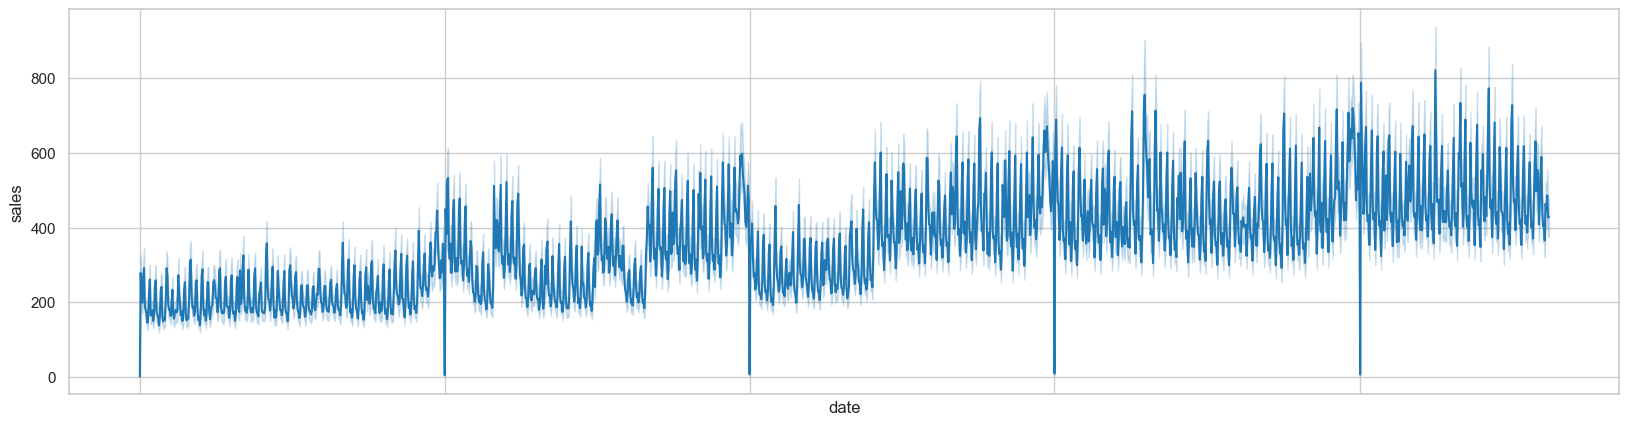

In [3]:
sns.lineplot(x='date',y='sales',data=train_data);
plt.xticks(visible=False);

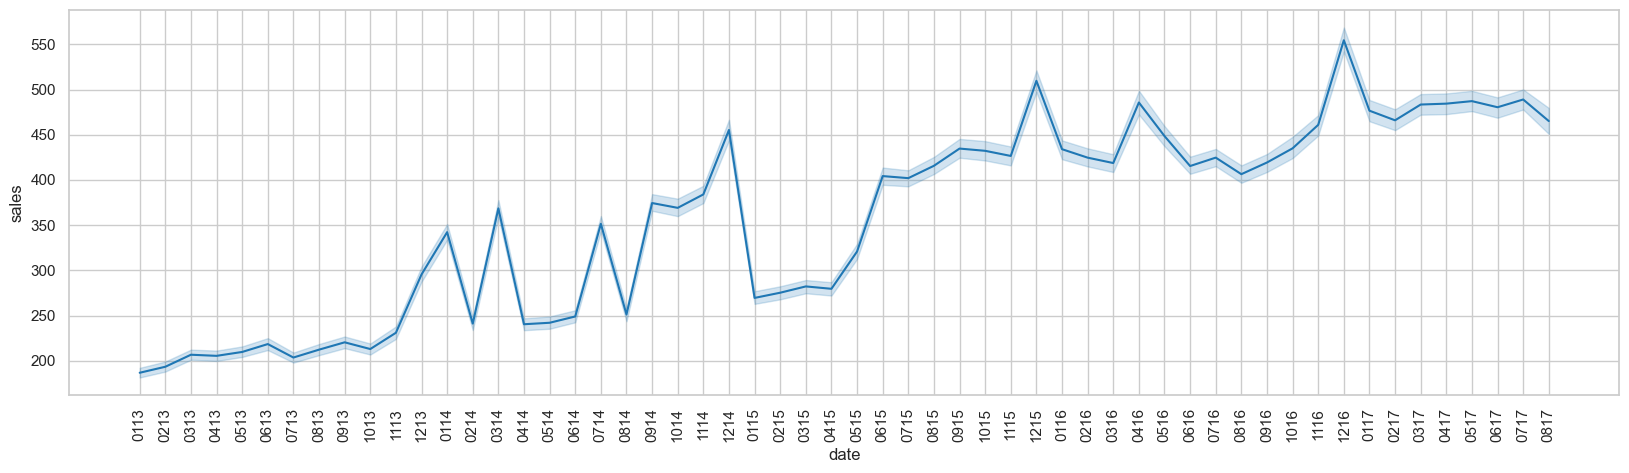

In [4]:
sns.lineplot(x=train_data['date'].dt.strftime('%m%y'),y=train_data['sales']);
plt.xticks(rotation='vertical');

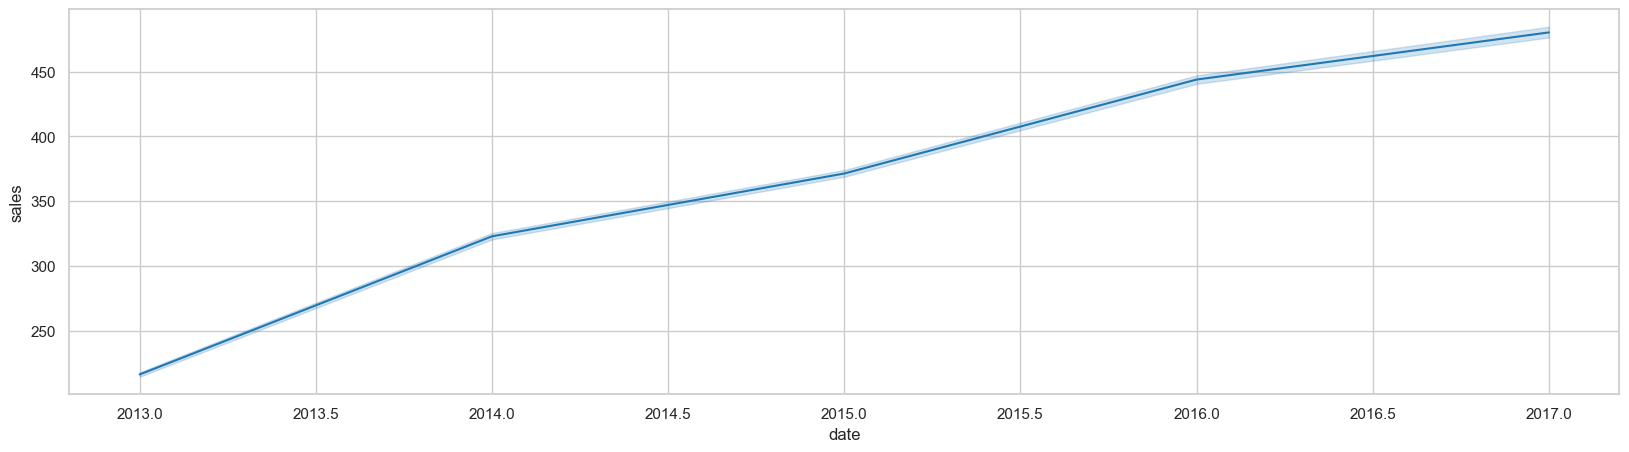

In [135]:
sns.lineplot(x=train_data['date'].dt.year,y=train_data['sales']);

In [6]:
from statsmodels.tsa.stattools import adfuller
adfuller(train_data['sales'],autolag='AIC')[1]

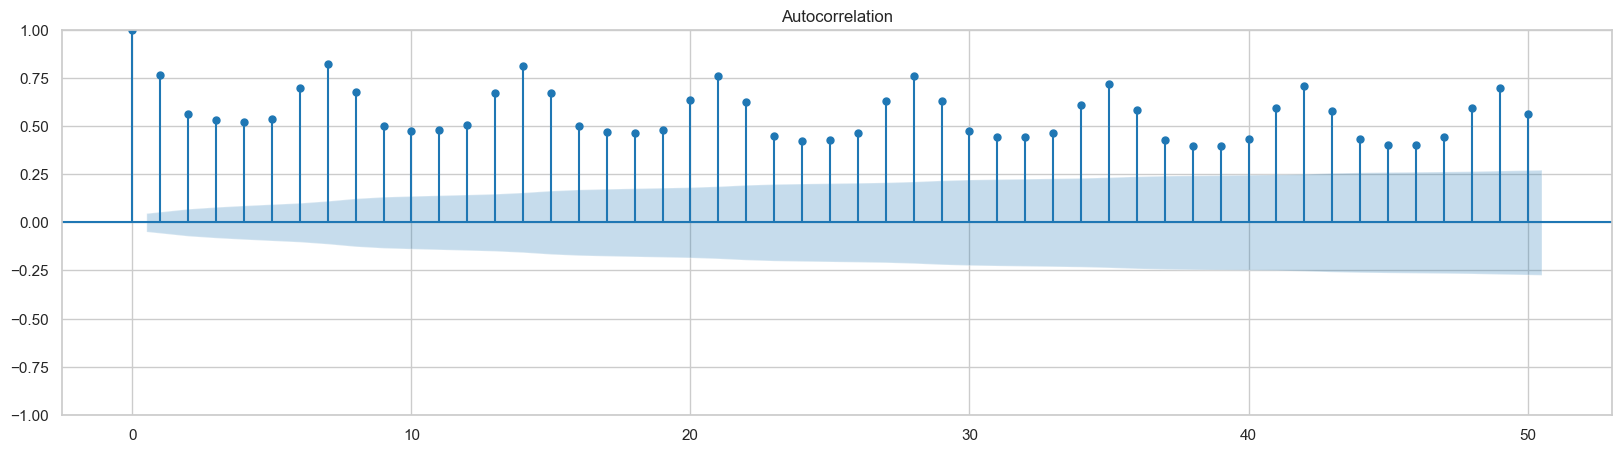

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['sales'],lags=50);

C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


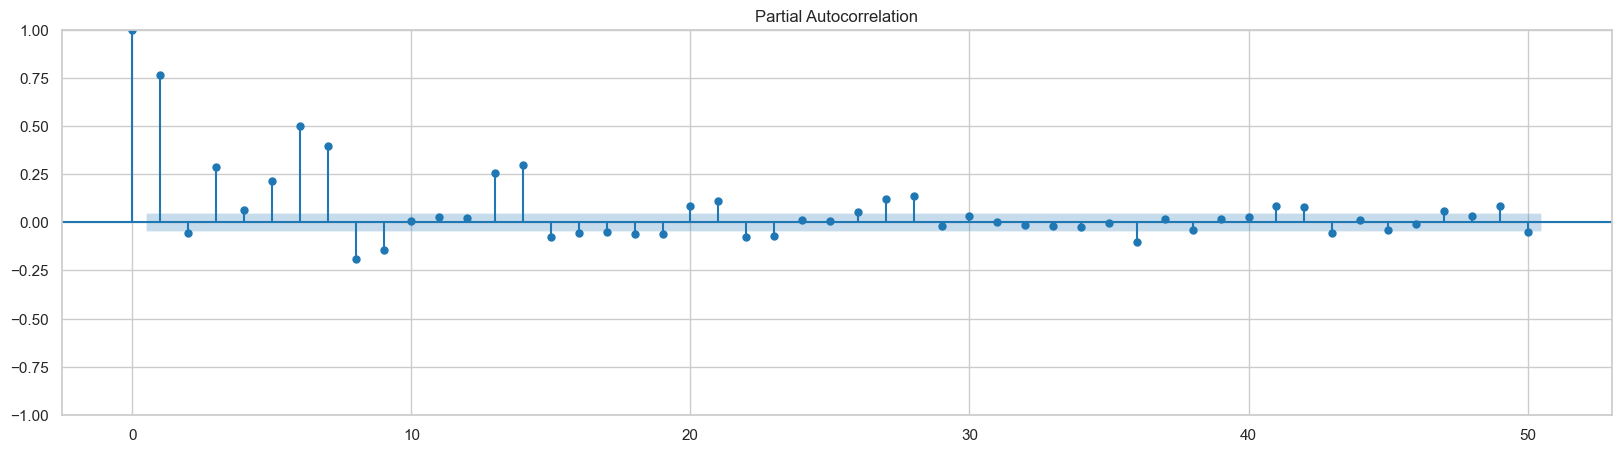

In [69]:
plot_pacf(df['sales'],lags=50);

In [ ]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['sales'],
                          start_p=1, start_q=1, max_p=3, max_q=3,
                          m=12, start_P=0, seasonal=True, d=None, D=1, trace=True,
                          error_action='ignore', suppress_warnings=True, stepwise=True)

In [ ]:
stepwise_fit.summary()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['sales'], order=(1,7,))
results = model.fit()

In [ ]:
results.summary()

In [ ]:
plt.plot(results.resid)

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = SARIMAX(df['sales'],order=(3,0,2),seasonal_order=(2,1,1,12))
arima_model = arima_model.fit()

C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimi

In [57]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [55]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
print(start,end)

3000888 3029399


In [58]:
pred_arima = arima_model.predict(start=3000888,end=3000892)

C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MemoryError: Unable to allocate 34.0 GiB for an array with shape (39, 39, 2999209) and data type float64